In [20]:
function euclidean1(a, b)
    println("calling Any")
    if a >= b
        return a - b
    else
        return b - a
    end
end
euclidean1(1, 2)

calling Int64


1

In [23]:
euclidean1("Hello", "world")

calling Any


LoadError: `-` has no method matching -(::ASCIIString, ::ASCIIString)
while loading In[23], in expression starting on line 1

In [21]:
function euclidean1(a::Int64, b::Int64)
    println("calling Int64")
    if a >= b
        return a - b
    else
        return b - a
    end
end
euclidean1(1, 2)

calling Int64


1

In [22]:
function euclidean1(a::Float64, b::Float64)
    println("calling Float64")
    if a >= b
        return a - b
    else
        return b - a
    end
end
euclidean1(1.2, 2.4)

calling Float64


1.2

In [2]:
using Gadfly

LoadError: Gadlfy not found
while loading In[2], in expression starting on line 1

In [4]:
Pkg.update()
Pkg.add("Gadfly")

INFO: Updating METADATA...
INFO: Updating Interact...
INFO: Updating JuliaBox...
INFO: Updating Homework...
INFO: Computing changes...
INFO: No packages to install, update or remove
INFO: Nothing to be done


In [5]:
using Gadfly

true
true
true
true
true
false


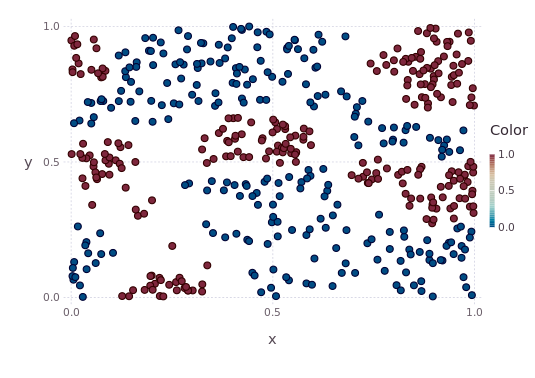

In [32]:
srand(42)

const RED = 0
const BLUE = 1

const TOTAL_AGENT = 500
const NEAR_AGENT = 10
const PASS_AGENT = 7

type Agent
    color::Int
    location::Array
    move::Bool
    Agent(color::Int) = new(color, rand(1, 2), true)
end

function euclidean(a::Agent, b::Agent)
    return sqrt(sum((a.location .- b.location) .^ 2))
end

function is_unhappy(target, agents)
    dist = sort!([(euclidean(target, agent), agent) for agent in agents])[1:NEAR_AGENT]
    return length(filter(x->x[2].color==target.color, dist)) < PASS_AGENT ? true : false
end


function check_move(agents)
    println(length(filter(x->x.move==true, agents)) == 0 ? false : true)
    return length(filter(x->x.move==true, agents)) == 0 ? false : true
end


function draw_agents(agents)
    x = [agent.location[1] for agent in agents]
    y = [agent.location[2] for agent in agents]
    c = [agent.color for agent in agents]
    plot(x=x, y=y, color=c)
end

function main()
    agents = [n>TOTAL_AGENT/2 ? Agent(RED): Agent(BLUE) for n=1:TOTAL_AGENT]

    while check_move(agents)
        for target in agents
            target.move = false
            while is_unhappy(target, agents)
                target.location = rand(1, 2)
                target.move = true
            end
        end
    end
    draw_agents(agents)
end
main()